In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, ConfusionMatrixDisplay)
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Load dataset
wine_data = load_wine()
X = wine_data.data  # Features (178 samples x 13 features)
y = wine_data.target  # Target variable (3 classes)

In [3]:
# Display dataset information
print(f"Dataset: Wine Recognition")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class names: {wine_data.target_names}\n")

Dataset: Wine Recognition
Number of samples: 178
Number of features: 13
Number of classes: 3
Class names: ['class_0' 'class_1' 'class_2']



In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [5]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Initialize and train classifier (Support Vector Machine)
classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
classifier.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [7]:
# Make predictions
y_pred = classifier.predict(X_test_scaled)

In [8]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=wine_data.target_names)

In [9]:
# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9778

Confusion Matrix:
[[15  0  0]
 [ 0 18  0]
 [ 0  1 11]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        15
     class_1       0.95      1.00      0.97        18
     class_2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

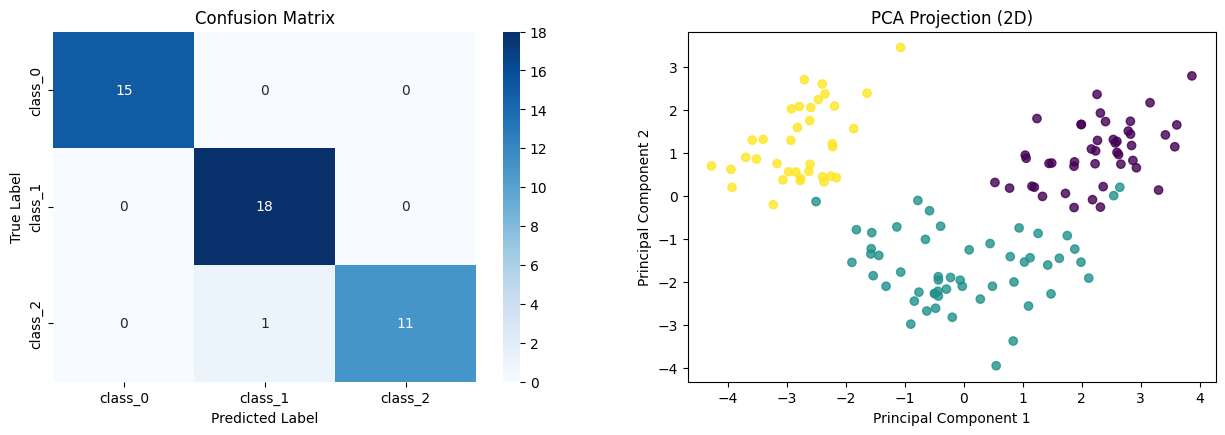

In [10]:
# Visualizations
plt.figure(figsize=(15, 10))

# 1. Confusion Matrix Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine_data.target_names,
            yticklabels=wine_data.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 2. PCA Projection (2D)
plt.subplot(2, 2, 2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.8)
plt.title('PCA Projection (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],
           labels=wine_data.target_names,
           title="Wine Classes")

# 3. Feature Importance (using coefficients from SVM)
plt.subplot(2, 2, 3)
if hasattr(classifier, 'coef_'):
    coef = np.abs(classifier.coef_).mean(axis=0)
    sorted_idx = np.argsort(coef)[::-1]
    top_features = 10

    plt.barh(range(top_features), coef[sorted_idx][:top_features][::-1], align='center')
    plt.yticks(range(top_features), np.array(wine_data.feature_names)[sorted_idx][:top_features][::-1])
    plt.title('Top Important Features')
    plt.xlabel('Average Absolute Coefficient')
else:
    plt.text(0.5, 0.5, 'Feature importance not available\nfor this classifier',
             ha='center', va='center')
    plt.title('Feature Importance')

# 4. Class Distribution
plt.subplot(2, 2, 4)
class_counts = np.bincount(y)
plt.bar(wine_data.target_names, class_counts, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Class Distribution')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()